# Install Detectron2 Dependencies

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.8/703.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.13.1+cu116 requires t

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=0fc85dc5a8bb135749304784366d807074b27d380074643acb5da647c264774b
  Stored in directory: /root/.cache/pip/wheels/b8/79/07/c0e9367f5b5ea325e246bd73651e8af175fabbef943043b1cc
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=90f387fd7885960b54957e221beb5a1aa9d911abc1ed62adea5a2a32f29ab012
  Stored in directory: /root/.cache/pip/wheels/89/3e/24/0f349c0b2e

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

# Import and Register Custom Detectron2 Dataset from Roboflow

In [ ]:
!curl -L "https://app.roboflow.com/ds/D5Ehgt2MeV?key=wAV194uG6q" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   906  100   906    0     0    507      0  0:00:01  0:00:01 --:--:--   506
100 1128k  100 1128k    0     0   558k      0  0:00:02  0:00:02 --:--:--  558k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/image1_jpeg.rf.7561d03000a893458a81e7602321c5e4.jpg  
   creating: train/
 extracting: train/20230201_195641_jpg.rf.22a9b3df972c24aaf0ba8a91cbb24754.jpg  
 extracting: train/20230201_195641_jpg.rf.4d1412a4ab95e0820857f53d3754e3cc.jpg  
 extracting: train/20230201_195641_jpg.rf.f19bc03e35c0bb471c89a6be8b5ed5e2.jpg  
 extracting: train/_annotations.coco.json  
 extracting: train/image0_jpeg.rf.0a5d2a49f915cf4b1c362187cca1b984.jpg  
 extracting: train/image0_jpeg.rf.64a652c86bc98f3b040c346e59c0b81e.jpg 

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")


WARNING [02/03 20:09:15 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/03 20:09:15 d2.data.datasets.coco]: Loaded 26 images in COCO format from /content/train/_annotations.coco.json


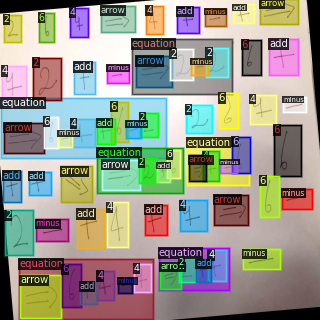

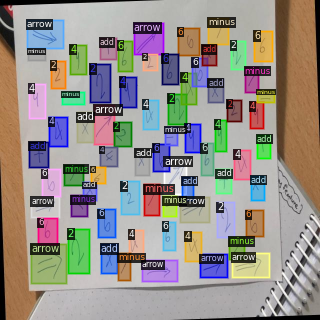

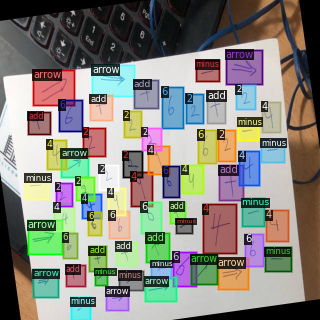

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Train Custom Detectron2 Detector

In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.01


cfg.OUTPUT_DIR = "/content/gdrive/My Drive/V1/"


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [ ]:
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[02/03 20:11:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:06, 64.4MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[02/03 20:11:58 d2.engine.train_loop]: Starting training from iteration 0
[02/03 20:12:35 d2.utils.events]:  eta: 0:45:56  iter: 19  total_loss: 3.499  loss_cls: 2.004  loss_box_reg: 0.704  loss_rpn_cls: 0.318  loss_rpn_loc: 0.423  time: 1.8415  data_time: 0.0331  lr: 0.000200  max_mem: 7205M
[02/03 20:13:13 d2.utils.events]:  eta: 0:46:04  iter: 39  total_loss: 2.067  loss_cls: 1.004  loss_box_reg: 0.707  loss_rpn_cls: 0.110  loss_rpn_loc: 0.229  time: 1.8759  data_time: 0.0116  lr: 0.000400  max_mem: 7205M
[02/03 20:13:50 d2.utils.events]:  eta: 0:45:20  iter: 59  total_loss: 1.790  loss_cls: 0.858  loss_box_reg: 0.691  loss_rpn_cls: 0.052  loss_rpn_loc: 0.188  time: 1.8758  data_time: 0.0153  lr: 0.000599  max_mem: 7205M
[02/03 20:14:30 d2.utils.events]:  eta: 0:45:33  iter: 79  total_loss: 1.720  loss_cls: 0.826  loss_box_reg: 0.703  loss_rpn_cls: 0.035  loss_rpn_loc: 0.168  time: 1.9031  data_time: 0.0102  lr: 0.000799  max_mem: 7205M
[02/03 20:15:08 d2.utils.events]:  eta: 0:45:0

In [ ]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./content/gdrive/My Drive/V1/")#"./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [02/03 21:01:59 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/03 21:01:59 d2.data.datasets.coco]: Loaded 1 images in COCO format from /content/test/_annotations.coco.json
[02/03 21:01:59 d2.data.build]: Distribution of instances among all 8 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|  numbers   | 0            |     2      | 10           |     4      | 10           |
|     6      | 10           |    add     | 8            |   arrow    | 10           |
|  equation  | 0            |   minus    | 9            |            |              |
|   total    | 57           |            |              |            |              |
[02/03 21:01:59 d2.data.common]: Serializing 1 elements to byte tensors and concatenating them all ...
[02/03 21:01:59 d2.data.common]: Serialized data

OrderedDict([('bbox',
              {'AP': 52.9828893603646,
               'AP50': 98.34983498349835,
               'AP75': 40.65829797265441,
               'APs': nan,
               'APm': 52.9828893603646,
               'APl': nan,
               'AP-numbers': nan,
               'AP-2': 50.20792079207921,
               'AP-4': 52.986012887002985,
               'AP-6': 48.05799151343706,
               'AP-add': 60.254596888260245,
               'AP-arrow': 56.675467546754675,
               'AP-equation': nan,
               'AP-minus': 49.71534653465346})])

# Inference with Detectron2 Saved Weights



In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

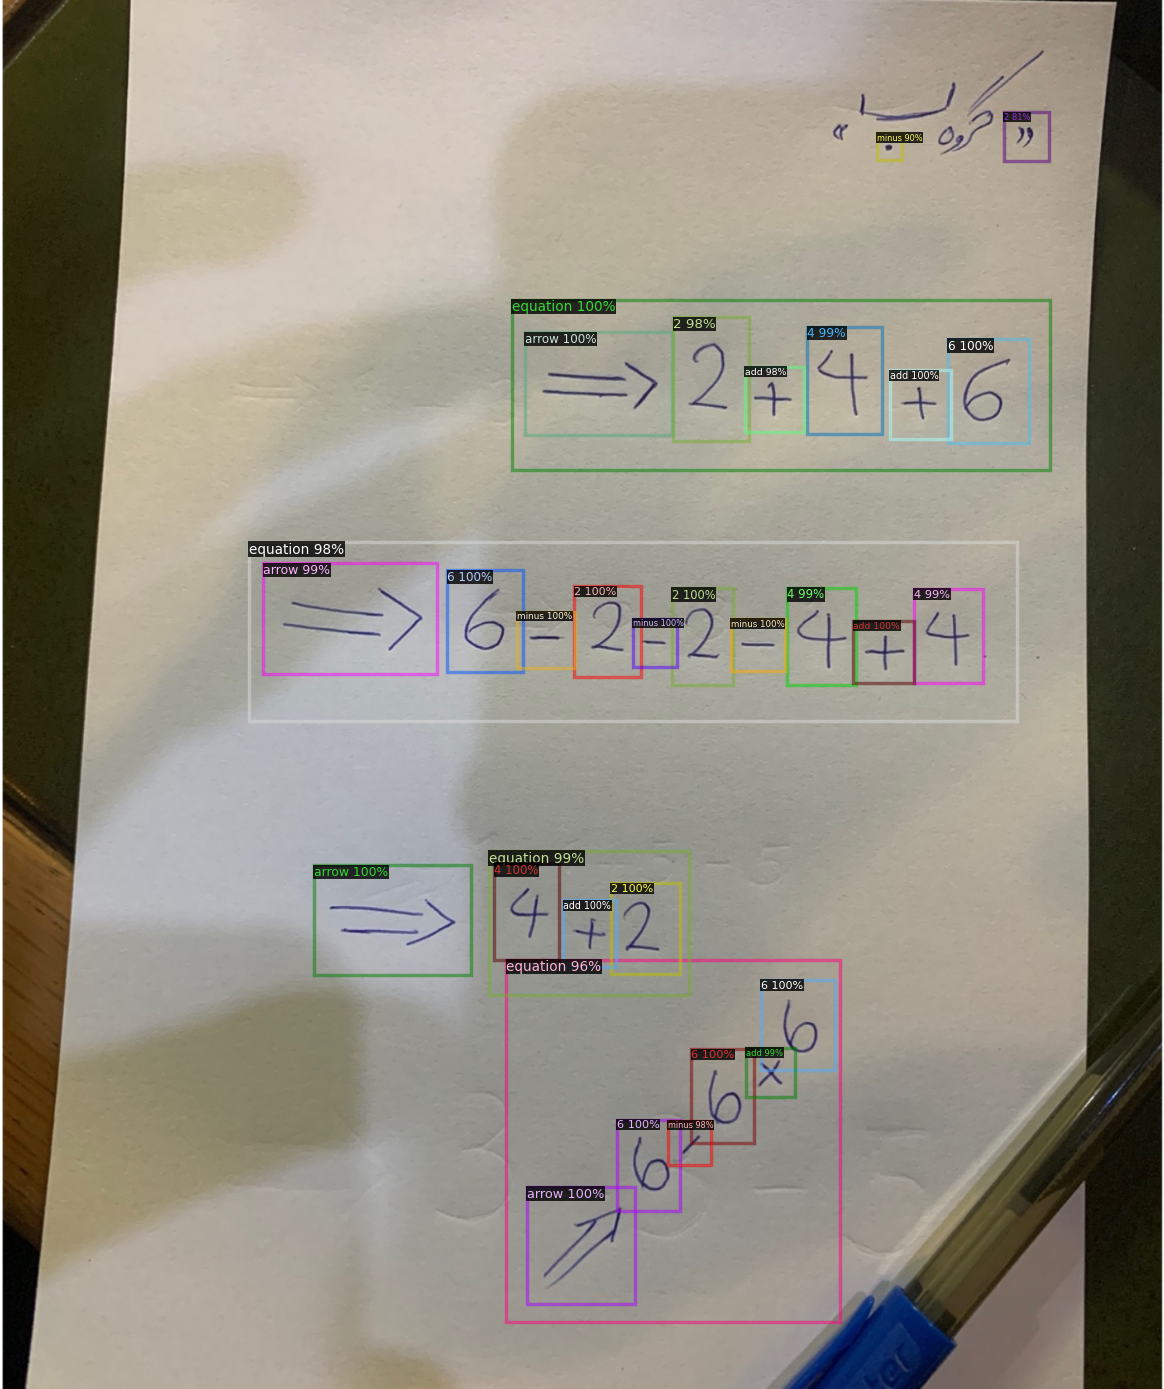

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

# for imageName in glob.glob('/content/test/*jpg'):
imageName = '/content/test.png'
im = cv2.imread(imageName)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], metadata=test_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])


In [ ]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [ ]:
image = cv2.imread('/content/test.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
cordinate= outputs["instances"]

In [ ]:
scores = cordinate.scores.cpu().numpy()
print(scores)

[0.9995677  0.999498   0.99944896 0.9986512  0.9984434  0.99828416
 0.9982174  0.99819666 0.9979686  0.99790204 0.9974591  0.99720216
 0.9970797  0.99707806 0.9970291  0.99650216 0.99645007 0.99559325
 0.99524045 0.99498415 0.99361706 0.9923267  0.9915387  0.99058086
 0.9890086  0.98093814 0.9780351  0.97618854 0.97616684 0.96466064
 0.89938664 0.8126077 ]


In [ ]:
pred_classes = cordinate.pred_classes.cpu().numpy()
print(pred_classes)

[5 3 3 3 4 3 7 1 1 5 7 6 4 1 2 7 3 4 5 5 2 2 4 6 2 6 1 7 4 6 7 1]


In [ ]:
boxes = cordinate.pred_boxes.tensor.cpu().numpy()
print(boxes)

[[ 658.1607  1484.7218   793.9057  1631.2064 ]
 [ 863.9684  1312.6191   942.4395  1429.2562 ]
 [ 559.2936   714.2887   653.2242   841.1603 ]
 [ 950.88367 1226.2035  1043.4021  1338.4197 ]
 [ 704.17633 1126.6354   770.31396 1209.424  ]
 [ 770.8158  1400.6461   850.23047 1514.5928 ]
 [ 646.314    765.9533   718.2085   836.2787 ]
 [ 839.5865   736.5309   916.62384  856.91864]
 [ 763.4242  1105.4333   849.9347  1218.4972 ]
 [ 392.42444 1082.8916   589.32556 1219.184  ]
 [ 913.5366   775.0214   980.94324  839.8317 ]
 [ 639.79425  376.23483 1312.9014   588.68945]
 [1066.7505   777.47705 1142.9286   855.636  ]
 [ 717.8354   734.40405  800.9674   847.68744]
 [ 617.77686 1079.9984   698.6588  1201.1614 ]
 [ 790.67126  774.51215  846.20233  834.4514 ]
 [1184.4482   425.46915 1286.5111   555.2913 ]
 [1112.2329   464.51367 1189.3256   550.07904]
 [ 655.88055  417.1217   840.4143   544.6142 ]
 [ 329.09485  705.4356   545.98096  844.014  ]
 [1009.1416   409.712   1102.3737   544.2712 ]
 [1142.4769  

In [ ]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (0, 0, 0) # Black


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    # x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
    # print("x_min: ", x_min)
    # print(" y_max: ",  y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)    
    cv2.rectangle(img, (x_min, y_min - int(0.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=1.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(img)

In [ ]:
equation = np.where(pred_classes == 6)
equation_boxes = [boxes[i] for i in equation]
equation_score = [scores[i] for i in equation]

In [ ]:
sumT = []
bboxes = []
category_ids = []

In [ ]:
for k in range(len(equation[0])):
  eq1 = boxes[equation[0][k]]
  component_boxes = []
  component_classes = []
  for i in range(len(boxes)):
    if(boxes[i][0]>eq1[0] and boxes[i][1]>eq1[1] and boxes[i][2]<eq1[2] and boxes[i][3]<eq1[3]):
      component_boxes.append(boxes[i])
      component_classes.append(pred_classes[i])
  sumtemp = []
  operand = 0
  n = len(component_classes)
  m = len(component_boxes[0])
  sum = 0
  for i in range(n):
    minnumber1 = min([component_boxes[j][0] for j in range(len(component_boxes))])
    nextitem = [(j) for j in range(len(component_boxes)) if component_boxes[j][0]==minnumber1]
    
    if(component_classes[nextitem[0]]==1):
      if(operand ==6):
        sum -= 2
      else:
        sum += 2
    elif(component_classes[nextitem[0]]==2):
      if(operand ==6):
        sum -=4
      else:
        sum += 4
    elif(component_classes[nextitem[0]]==3):
      if(operand ==6):
        sum -= 6
      else:
        sum += 6
    elif(component_classes[nextitem[0]]==4):
      operand = 4
    elif(component_classes[nextitem[0]]==7):
      operand = 6
    del component_classes[nextitem[0]]
    del component_boxes[nextitem[0]]
  sumT.append(sum)
  sumtemp = boxes[equation[0][k]]
  bboxes.append(sumtemp)
  category_ids.append(k)

In [ ]:
category_id_to_name = {}
for i in category_ids:
    print(i)
    category_id_to_name[i] = str(sumT[i])
print(category_id_to_name)

0
1
2
3
{0: '12', 1: '6', 2: '2', 3: '6'}


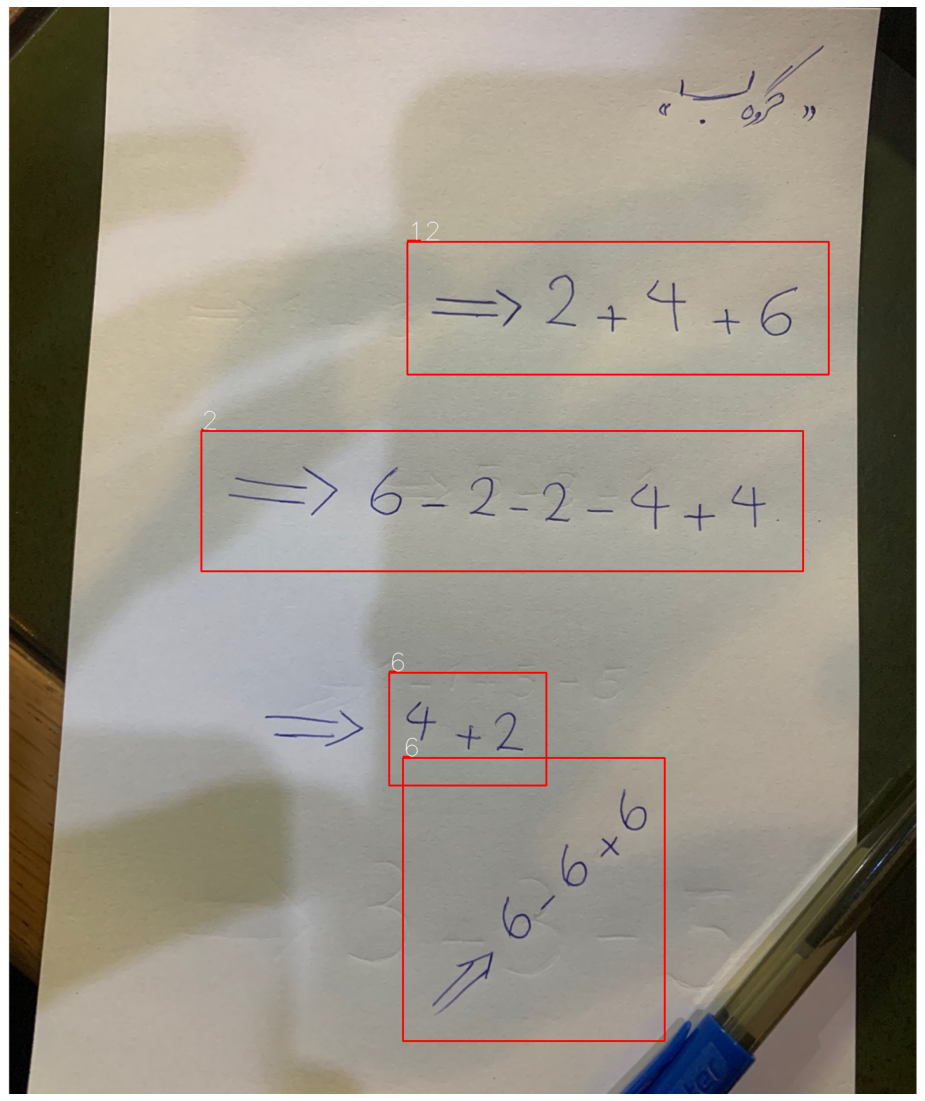

In [ ]:
visualize(image, bboxes, category_ids, category_id_to_name)

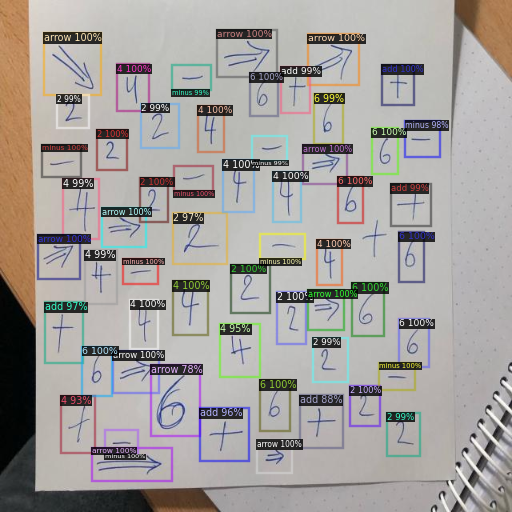

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
